# ДЗ №2 - обучение модели трехслойного перцептрона методом градиентного спуска

## Задача 1
В качестве теоретического задания в этом ДЗ предлагается провести вывод функции ошибки для задачи регрессии в предположении, что целевая переменная подчиняется распределению Лапласа. Также предлагается воспользоваться байесовским выводом и в том же предположении относительно распределения целевой переменной вывести форму функции потерь с условием лапласовского априорного распределения параметров модели.

<center><h1>Решение задачи 1</h1></center>

Пусть целевая переменная имеет <a href=https://en.wikipedia.org/wiki/Laplace_distribution>распределение Лапласа</a>, то есть ее функция плотности задается, как $\rho(x|\mu, \sigma) = 	{\displaystyle {\frac {1}{2\sigma}}\exp \left(-{\frac {|x-\mu |}{\sigma}}\right)}$, где $\mu \in R_{+}$  и $\sigma \in R$ -  некоторые параметры. Также имеет место быть постановка предположения, что $y_{true} = y_{pred}(x, w) + \epsilon$, где $\epsilon$ - ошибка, имеющая распределение $Laplace(\mu_{\epsilon}, \sigma_{\epsilon})$, то тогда y_{true} также случайная величина, но имеющая распределение с параметрами $\mu = \mu_{\epsilon} + y_{pred}$ и $\sigma = \sigma_{\epsilon}$.

Пусть формально у нас есть какая-то выборка данных $Y$, которая состоит из некоторого набора элементов $\{y_i\}_{i=1}^n$, и, предполагая, что данные у нас независимо и одинаково распределенные с распределением Лапласа, зависящие от некоторого, возможно многомерного, параметра $\theta$, можно вывести оптимальную оценку этого параметра. Ниже будет представлен вывод оценки через **оценку максимального правдоподобия** и **максимизацию апостериорного распределения**.

## Оценка максимального правдоподобия
Данный подход оценивает параметр $\theta$ через следующую цепочку рассуждений:
$$
\theta_{MLE} =
argmax(\rho(Y|\theta)) =
argmax(\rho(y_1, y_2...y_n|\theta)) =
argmax(\prod\limits_{i=1}^n\rho(y_i|\theta)) =
argmax(\sum\limits_{i=1}^n\log(\rho(y_i|\theta))),
$$
Соответственно, если $Y$ порождены распределением Лапласа, то при подстановке соответствующей функции плотности получим:

$$\theta_{MLE}= argmax(-n\log (2\sigma)-\frac{1}{\sigma}\sum_{t=1}^N |x_t-\mu - y^i_{pred}(\theta)|),$$ а так как экстремум ищется по $\theta$, то данная задача эквивалентна следующей (при условии также, что $\mu = 0$, а $\sigma = 1$:
$$\theta_{MLE} = argmin(\sum\limits_{i=1}^n|y_i - y^i_{pred}|),$$
что и является в чистом виде $MAE$.

## Оценка апостериорного максимума 
Теперь помимо выше сделанных предположений о $Y$, также предположим, что $\theta \sim Laplace(\mu_{\theta}, \sigma_{\theta})$ (что есть априорным распределением).
Тогда, опираясь на метод максимизации апостериорного распределения будем искать $\theta_{MAP}$, как решение задачи:
$$\theta_{MAP} = argmax(\rho(\theta | Y)),$$
что в силу формулы Байеса  принимает вид:
$$\theta_{MAP} = 
argmax(\rho(\theta | Y)) = 
argmax(\frac{\rho(Y | \theta) \rho(\theta)}{  \rho(Y) }) = 
argmax(\rho(Y | \theta) \rho(\theta)) = 
argmax(log(\rho(Y | \theta)) + log(\rho(\theta))) = 
argmax(\sum\limits_{i=1}^n log(\rho(y_i | \theta) + log(\rho(\theta)))
$$
Если брать во внимание сделанные предположения о $\theta$ и $Y$:
$$\theta_{MAP} = 
argmax( -n\log (2\sigma)-\frac{1}{\sigma}\sum_{t=1}^N |x_t-\mu - y^i_{pred}(\theta)| -n\log (2\sigma_{\theta}) - \sum\limits_{i=1}^n |\theta_{i}|)
$$
что и при соответствующих парематрах модели (среднего и дисперсии), дает следующую задачу:
$$\theta_{MLE} = argmin(\sum\limits_{i=1}^n|y_i - y^i_{pred}| + \sum\limits_{i=1}^n |\theta_{i}|),$$
а это ничто иное как $MAE$ с $L^1$ - регуляризацией.

## Задача 2
В этом ДЗ предлагается реализовать модель трехслойного перцептрона и обучение этой модели методом градиентного спуска.

На этот раз предлагается работать с реальными данными. Данные представляют из себя набор рукописных цифр. Это изображения размером 28х28. Каждому изображению поставлен в соответствие класс - арабская цифра. Задача модели - определить цифру, соответствующую произвольному изображению из тестового набора данных.

Так же, как и в ДЗ №1, предлагается реализовать функцию потерь и саму модель перцептрона в манере, схожей с построением модулей фреймворка pytorch.

В решении ожидается наличие следующих ключевых составляющих:<br />

- (текст) формулировка задачи +
- (текст) формулировка признакового описания объектов +
- (текст, формулы) формулировка модели многослойного перцептрона +
- (текст, формулы) формулировка функции ошибки +
- (текст, формулы) формулировка меры качества модели +
- (текст, код и диаграммы) исследование исходных данных: распределение признаков и другие действия, дающие понимание о характере исходных  данных +
- (текст, код, диаграммы) фильтрация признаков (при необходимости), порождение признаков (при необходимости) +
- (формулы, код, результаты, коммментарии) обучение модели методом градиентного спуска +
- (код, результаты, комментарии) оценка качества модели на валидационной выборке +

#### Код решения:
(можно использовать предлагаемые шаблоны)
- формулировка модели трехслойного перцептрона. Имеется в виду только один скрытый слой; +
- формулировка функции ошибки; +
- формулировка метрики (метрик); +
- формулировка цикла оптимизации параметров. +

#### Визуализация в решении:
- распределение признаков; +
- распределение целевой переменной; +
- отдельные экземпляры выборки в виде изображений; +
- эволюция функции ошибки по ходу обучения; +
- эволюция метрики(метрик) по ходу обучения +

#### Выводы
- вывод о достаточности или избыточности данных для оценки параметров модели
- вывод о соотношении выразительности модели и ее обобщающей способности (наблюдаются ли явления переобучения или недообучения).

Примечание:<br />
Реализация перцептрона и других составляющих исследования может быть написана только с использованием библиотеки Numpy или scipy. Решения с использованием библиотек автоматического вычисления градиентов не засчитываются.

### Исходные данные

Исходные данные можно скачать [по этой ссылке](https://www.dropbox.com/s/y6ar7i7mb6fvoed/mnist.npz). Набор данных MNIST поставляется в различных вариантах. В варианте, доступном по приведенной ссылке, чтение исходных данных может быть выполнено следующим образом:

```
import numpy as np
mnist = np.load('mnist.npz')
x_train = mnist['x_train']
y_train = mnist['y_train']
x_test = mnist['x_test']
y_test = mnist['y_test']
```

### Многослойный перцептрон

Напомним, мы задаем мнолослойный перцептрон как сложную функцию, в которой используются линейные операции и поточечные нелинейные преобразования. Если входные данные (признаковое описание объекта) заданы вектором $x$, то функция перцептрона с одним скрытым слоем выглядит следующим образом:
$$
F(x) = \Psi\left(\phi\left( {x}\cdot\theta_1 + b_1 \right)\cdot\theta_2 + b_2\right),
$$
где $x$ имеется в виду без дополнительного единичного признака; $\phi$ - функция активации скрытого слоя; $\Psi$ - функция активации выходного слоя перцептрона.

Напомним также, что в задаче жесткой многоклассовой классификации на $K$ классов допустим вариант формулировки модели, такой что:
- количество признаков целевой переменной совпадает с количеством классов $K$;
- в качестве функции активации $\Psi$ может использоваться `softmax`:
$$
\Psi(h_i) = \frac{e^{h_i}}{\sum_{j=1}^{K}{e^{h_j}}}
$$
- в качестве функции потерь может использоваться перекрестная энтропия в многоклассовом варианте (приведено в записи для одного объекта):
$$
{\mathscr{L}}\left(\hat{y},y\right) = -\sum_{j=1}^{K}{y_j*ln\left(\hat{y}_j\right)},
$$
где $\hat{y}=F(x)$

В своем решении вы никак не ограничены в выборе функций активации $\phi$ или $\Psi$. Однако есть некоторые устоявшиеся практики применения функций `ReLU, sigmoid, tanh`.

### Особенности реализации функции `softmax`
Несложно заметить, что как в числителе, так и в знаменателе функции `softmax` стоит экспонента некоторого числа. При этом следует понимать, что разрядность чисел с плавающей точкой `float32`, `float64` и даже `float128` не бесконечны. Свойства экспоненты таковы, что, например, для переполнения разрядности чисел `float64` (максимум  $\sim1.78*10^{308}$) достаточно показателя, превышающего 710, что совсем немного. Поэтому в случае практической реализации функции `softmax` имеет смысл предусмотреть случаи, когда аргументы экспоненты велики или, наоборот, слишком малы.

В этом ДЗ кроме прочих заданий вам нужно реализовать вычислительно стабильную версию `softmax`.

### Особенности вычисления градиента функции потерь

В этом домашнем задании, также как и в ДЗ№1 предлагается реализовывать функцию потерь и отдельные вычислительные блоки перцептрона наследующими `Differentiable` для общности восприятия этих модулей как дифференцируемых по своим аргументам. По желанию можно вычислить градиент функции потерь по параметрам модели вручную (и далее реализовать его в коде), однако предпочитаемым способом будет реализация градиента каждого из вычислительных блоков по аргументу в методе `backward()` и использование этого результата в обобщенном виде, без упрощения. Этот вариант вычисления градиента функции потерь по параметрам модели называется "backpropagation" ("метод обратного распространения ошибки" или "метод обратной волны" у разных авторов).

Нелишним будет напомнить, что в некоторых случаях для вычисления компоненты градиента необходимо хранить значения, полученные на этапе вычисления функции $F(x)$. В вашем решении это может быть устроено по-разному. Но для тех, кто хочет придерживаться предложенного шаблона, введен атрибут `state` класса `Differentiable`.

<center><h1>Решение задачи 2</h1></center>



# Теоретические сведения

## Общая постановка задачи
В данном задании требуется реализовать модель *трехслойного перцептрона*. В этом случае подразумевается, что первым слоем будет слой входных данных, затем один скрытый, который переходит в слой с ответом нашей модели.

Задача связана с *классификацией* картинок из датасета **MNIST**. Требуется настроить алгоритм, который будет оптимально каждой картинке 28х28 ставить в соответствие некоторое число, которое на ней изображено.

В общем виде, многослойный перцептрон можно определить следующим образом:

$$
\begin{equation}
    \begin{cases}
    h_1 = \psi_1(\theta_1^T \cdot \phi_1(x))
    \\
    h_2 = \psi_2(\theta_2^T  \cdot \phi_2(h_1))
    \\
    \vdots
    \\
    h_k = \psi_k(\theta_k^T \cdot \phi_k(h_{k-1}))
    \\
    y = \psi_{k+1}(\theta_{k+1}^T \cdot \phi_{k+1}(h_k))
    \end{cases}
\end{equation}
$$

где $x$ - объект (в нашем случае, это картинка с числом), $\phi_i$ - basic function (фактически, некоторые преобразования над данными, например, нормировка), $\theta_i$ - матрица параметров, по которым будет происходить оптимизация, $\psi_i$ - activation function (какая-то нелинейная функция, для того чтобы $y$ задававал в итоге нелинейное отображение), $y$ - предсказание целевой метки (то есть для данной задачи - это предположительное число на картинке)

Либо же в более человеческом виде:
$$
y = y(h_k(h_{k-1}(h_{k-2}(...h_1(x)))))
$$

То есть многослойный перцептрон - это всего лишь сложная функция.

В нашей задаче:
- функция имеет вид: $F(x) = \Psi\left(\phi\left( {x}\cdot\theta_1 + b_1 \right)\cdot\theta_2 + b_2\right)$


- $X$ - это множество векторов из $R^{784}$, то есть это "плоское" представление матриц 28х28 (то есть каждая строка этой матрицы конкатенируется с предыдущей и в итоге получается вектор размера 784).


- $Y$ - one-hot вектор длиной 10, где единица стоит на месте с координатой истинной метки, а предсказанием алгоритма является вектор из вероятнотстей принадлежности каждому клаассу. Далее определим, каким образом получить эти самые вероятности


Очень упрощенно, скорее с точностью до схемы, но не до чисел, нашу модель можно изобразить следующим образом (хотя реализация ниже позволяет использовать любое количество слоев):

<img src=https://ljvmiranda921.github.io/assets/png/cs231n-ann/archi.png>

## Функция активации на выходном слое и функция потерь
`SoftMax` - обобщение сигмоида на многоклассовую классификацию. Так как хочется интерпретировать ответ алгоритма как вероятность, то `SoftMax` с этим отлично справляется, так как определяется следующим образом:
$$
y_{pred} = 
\begin{bmatrix} 
P(t=0 | \mathbf{z}) \\
\vdots \\
P(t=9 | \mathbf{z}) \\
\end{bmatrix}
= \begin{bmatrix} 
\varsigma(\mathbf{z})_0 \\
\vdots \\
\varsigma(\mathbf{z})_9 \\
\end{bmatrix}
= \frac{1}{\sum_{d=0}^9 e^{z_d}}
\begin{bmatrix} 
e^{z_0} \\
\vdots \\
e^{z_9} \\
\end{bmatrix}
$$, 
где $\varsigma(z)_c  := \frac{e^{z_c}}{\sum_{d=0}^9 e^{z_d}}$

Также *hack* на тему того, как избегать переполнения float64, да и других типов:  `Softmax(x) == Softmax(x - const)`


Нам потребуется найти производную `Cross-entropy` по аргументу `Softmax`, это можно сделать следующим образом:
$$
\begin{split}
\frac{\partial \xi}{\partial z_i} & = - \sum_{j=1}^C \frac{\partial t_j \log(y_j)}{\partial z_i}{} 
= - \sum_{j=1}^C t_j \frac{\partial \log(y_j)}{\partial z_i} 
= - \sum_{j=1}^C t_j \frac{1}{y_j} \frac{\partial y_j}{\partial z_i} \\
& = - \frac{t_i}{y_i} \frac{\partial y_i}{\partial z_i} - \sum_{j \neq i}^C \frac{t_j}{y_j} \frac{\partial y_j}{\partial z_i}
= - \frac{t_i}{y_i} y_i (1-y_i) - \sum_{j \neq i}^C \frac{t_j}{y_j} (-y_j y_i) \\
& = - t_i + t_i y_i + \sum_{j \neq i}^C t_j y_i = - t_i + \sum_{j = 1}^C t_j y_i
= -t_i + y_i \sum_{j = 1}^C t_j \\
& = y_i - t_i
\end{split}
$$

Также на *backward-проходе* нам предстоит уметь вычислять производную `Softmax`-a по параметрам. Формально, это можно сделать следюущим образом:
$$
\begin{split}
\text{если} \; i = j :& \frac{\partial y_i}{\partial z_i} = \frac{\partial \frac{e^{z_i}}{\Sigma_{0-9}}}{\partial z_i} = \frac{e^{z_i}\Sigma_{0-9} - e^{z_i}e^{z_i}}{\Sigma_{0-9}^2} = \frac{e^{z_i}}{\Sigma_{0-9}}\frac{\Sigma_{0-9} - e^{z_i}}{\Sigma_{0-9}} = \frac{e^{z_i}}{\Sigma_{0-9}}(1-\frac{e^{z_i}}{\Sigma_{0-9}}) =  y_i (1 - y_i)\\
\text{если} \; i \neq j :& \frac{\partial y_i}{\partial z_j} = \frac{\partial \frac{e^{z_i}}{\Sigma_{0-9}}}{\partial z_j} = \frac{0 - e^{z_i}e^{z_j}}{\Sigma_{0-9}^2} = -\frac{e^{z_i}}{\Sigma_{0-9}} \frac{e^{z_j}}{\Sigma_{0-9}} = -y_i y_j
\end{split}
$$, 
где $\Sigma_{0-9} := \sum\limits_{d=0}^{9} e^{z_{d}}$

Так как ответ алгоритма воспринимается как верооятность, то логичным будет максимизировать правдоподобие. По аналогии с тем, как выводится `logloss` для бинарной классификации, можно вывести общий вид этой функции потерь, который и будет именоваться, как `Cross-entropy`:
$$
L(Y,Y_{pred}) = \sum_{i=1}^n l(\mathbf{y}_i,\mathbf{y}^{pred}_i) = -\sum_{i=1}^n \sum_{d=0}^{9} y_{id} \cdot \log( y^{pred}_{id})
$$,
где $n$ - размер минибатча.

## Описание метода оптимизации
В данной реализации полносвязной нейронной сети будем использовать градиентную оптимизацию, а именно `Nesterov momentum`. Это модификация стохастического градиентного спуска, которая формально реализуется следующим образом:

$$
\begin{equation}
    \begin{cases}
    m_t = m_{t - 1} \cdot \beta + \nabla_{\theta} L(\theta_{t-1} + m_{t - 1} \cdot \beta) \cdot (1 - \beta)
    \\
    \theta_t = \theta_{t-1} - \alpha \cdot m_t
    \end{cases}
\end{equation}
$$

Для шага оптимизации  надо знать значение импульса для каждого параметра, а как следствие уметь посчитать градиент по параметру. Для этого используют `back propagation` - метод вычисления градиента лосса по параметрам нейронной сети.<br>

Для начала заметим, что параметрами в нашем перцептроне являются $\theta_2, \theta_1, b_2, b_1$. Таким образом, нам надо научиться оптимально считать $\frac{\partial L}{\partial \theta_2}, \frac{\partial L}{\partial \theta_1}, \frac{\partial L}{\partial b_2}, \frac{\partial L}{\partial b_1}$, чтобы делать шаг градиентного спуска для каждого из параметров.

Введем следующие обозначения:
$$
a_2 = \Psi\left(\phi\left( {x}\cdot\theta_1 + b_1 \right)\cdot\theta_2 + b_2\right)
\\
o_2 = \phi\left( {x}\cdot\theta_1 + b_1 \right)\cdot\theta_2 + b_2
\\
a_1 = \phi\left( {x}\cdot\theta_1 + b_1 \right)
\\
o_1 = {x}\cdot\theta_1 + b_1 
$$
Причем, в таких обозначениях, $a_i$ - по сути input на $i+1$ слой, а o_i - output на i линейном слое.

Теперь остается заметить, что:
$$
\begin{equation}
\frac{\partial L}{\partial b_2} = \frac{\partial L}{\partial a_2} \frac{\partial a_2}{\partial o_2} \frac{\partial o_2}{\partial b_2} = o_2 - y
\\
\frac{\partial L}{\partial \theta_2} = \frac{\partial L}{\partial a_2} \frac{\partial a_2}{\partial o_2} \frac{\partial o_2}{\partial \theta_2} = (o_2 - y) \cdot a_1
\\
\frac{\partial L}{\partial b_1} = \frac{\partial L}{\partial o_2} \frac{\partial o_2}{\partial a_1} \frac{\partial a_1}{\partial o_1} \frac{\partial o_1}{\partial b_1} = \frac{\partial L}{\partial o_2} \cdot \theta_2 \cdot \phi(o_1) \cdot (1 - \phi(o_1))
\\
\frac{\partial L}{\partial \theta_1} = \frac{\partial L}{\partial o_2} \frac{\partial o_2}{\partial a_1} \frac{\partial a_1}{\partial o_1} \frac{\partial o_1}{\partial \theta_1} = \frac{\partial L}{\partial o_2} \cdot \theta_2 \cdot \phi(o_1) \cdot (1 - \phi(o_1)) \cdot X
\end{equation}
$$
где $\phi(x)$ - сигмоид (для наглядности производной). 

Какой мы можем сделать из этого всего вывод? А такой, что на `forward-pass` следует кэшировать входные значения на каждом слое функции, а для того, чтобы подсчитать градиент по параметрам на слое $t$, надо также знать $\frac{\partial L}{\partial o_{t+1}},$ для того чтобы не пересчитывать по 100 раз (а лишь один раз) производные на "верхних слоях"

In [1]:
# Подгрузка основнвных модулей
import numpy as np
import pandas as pd

from abc import ABC, abstractmethod
from tqdm import tqdm
from itertools import chain

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

from warnings import simplefilter
simplefilter('ignore')

In [2]:
# Подгрузка данных с разделением на обучаующую и тестовую выборки
mnist = np.load('./mnist.npz')

x_train = mnist['x_train']
y_train = mnist['y_train']

x_test = mnist['x_test']
y_test = mnist['y_test']

# Исследовательский анализ данных

## Визуализация данных
Для начала посмотрим, как буквально выглядят данные

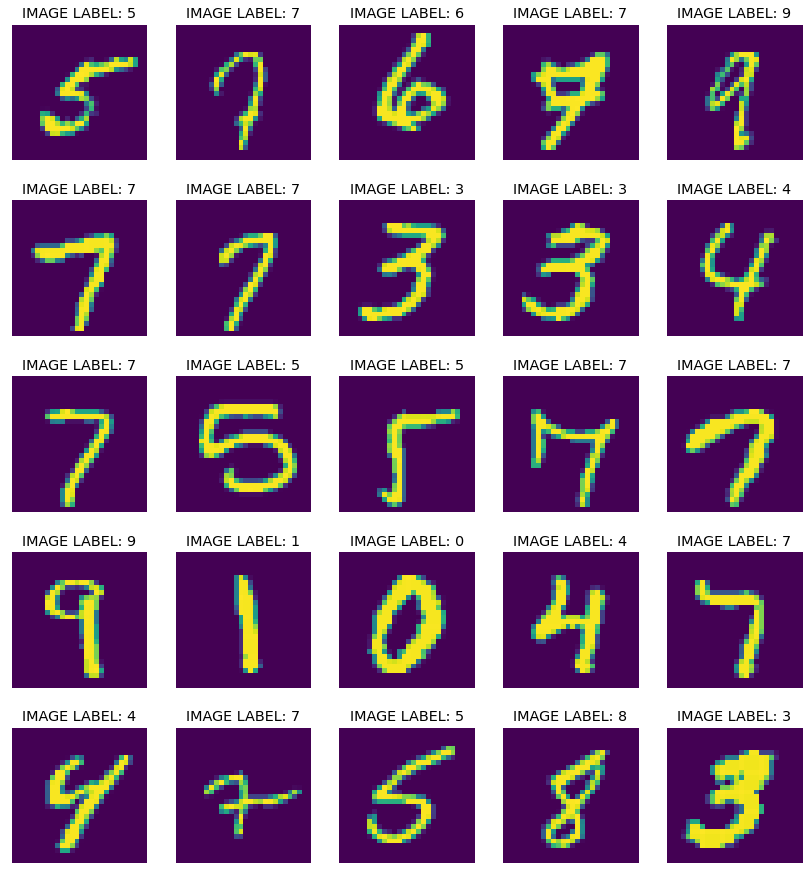

In [3]:
NUM = 5

fig, ax = plt.subplots(NUM, NUM, figsize=(10, 10))
plt.subplots_adjust(left=-0.2, bottom=-0.3)

for i in range(NUM**2):
    rand_num = np.random.randint(0, x_train.shape[0])
    
    ax[i // NUM, i % NUM].imshow(x_train[rand_num],)
    ax[i // NUM, i % NUM].set_title(f'IMAGE LABEL: {y_train[rand_num]}')
    ax[i // NUM, i % NUM].set_xticks([])
    ax[i // NUM, i % NUM].set_yticks([])
    ax[i // NUM, i % NUM].grid(False)

## Предобработка данных 

In [4]:
print(f"shape тренировочной выборки: {x_train.shape}")
print(f"shape тестовой выборки: {x_test.shape}")
print(f"shape целевой метки на тренировке: {y_train.shape}")
print(f"shape целевой метки на тесте: {y_test.shape}")

shape тренировочной выборки: (60000, 28, 28)
shape тестовой выборки: (10000, 28, 28)
shape целевой метки на тренировке: (60000,)
shape целевой метки на тесте: (10000,)


Как можно заметить, данные у нас представлены в виде 70000 матриц 28х28, причем значения в этих матрицах лежат в промежутке [0, 255].
Так как по условию задачи требуется реализовать полносвязную нейронную сеть, то на входной слой следует подавать вектор признаков, который является плоским представлением матриц 28х28 (то есть каждая строка этой матрицы конкатенируется с предыдущей и в итоге получатеся вектор размера 784).

Также, так как мы решаем задачу многоклассовой классификации, оптимизируя Cross-Entropy как функцию потерь (и используя Softmax, который возвращает вектор из вероятностей), то целевая метка должна быть не числом, а One-Hot вектором. 

Вдобавок, так как оптимизация градиентная, то нормализуем данные на отрезок [0, 1] по формуле $x := \frac{x - x_{min}}{x_{max} - x_{min}}$

In [5]:
def make_normal(data):
    assert data.ndim == 2
    
    min_value = data.min(axis=0)
    max_value = data.max(axis=0)
    
    return (data - min_value) / (max_value - min_value + 1e-100)


def make_flat(data):
    flat_data = data.reshape(data.shape[0], -1)
    
    assert flat_data.shape[1] == 784
    return flat_data


def make_one_hot(y, length=10):
    assert len(y.shape) == 1
    
    one_hot_y = np.empty(shape=(y.shape[0], length))
    
    for ind, obj_label in enumerate(y):
        one_hot_y[ind] = np.array([1 if obj_label == i else 0 for i in range(length)])
        
    return one_hot_y


def make_train_test(X, y, train_size=0.8):
    perm = np.random.permutation(range(len(X)))
    train_indx = perm[:int(train_size * len(X))]
    test_indx = perm[int(train_size * len(X)):]
    
    return (
        X[train_indx], X[test_indx],
        y[train_indx], y[test_indx],
    )

In [6]:
# flat для x
x_train_flat = make_flat(x_train)
x_test_flat = make_flat(x_test)

# one_hot для y
y_train_one_hot = make_one_hot(y_train)
y_test_one_hot = make_one_hot(y_test)

# здесь можно не париться о data leak'е, так как max = 255, min = 0 (почти наверное)
x_train = make_normal(x_train)
x_test = make_normal(x_test)

## Табличная предобработка

Созадим `DataFrame` для train и test выборок, чтобы в дальнейшем произвести манипуляции непосредственно на обеих выборках

In [7]:
columns_train = chain((f"pixel_{i}" for i in range(1, x_train.shape[1] + 1)), ('target',))

df_train = pd.DataFrame(
    np.concatenate((x_train, y_train[:, np.newaxis]), axis=1),
    columns=columns_train,
)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, pixel_1 to target
dtypes: float64(785)
memory usage: 359.3 MB


In [8]:
columns_test = chain((f"pixel_{i}" for i in range(1, x_test.shape[1] + 1)), ('target',))

df_test = pd.DataFrame(
    np.concatenate((x_test, y_test[:, np.newaxis]), axis=1),
    columns=columns_test
)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, pixel_1 to target
dtypes: float64(785)
memory usage: 59.9 MB


In [9]:
print(f'количество признаков с пустыми значениями на train: {(df_train.isna().sum() > 0).sum()}')
print(f'количество признаков с пустыми значениями на test: {(df_test.isna().sum() > 0).sum()}')

количество признаков с пустыми значениями на train: 0
количество признаков с пустыми значениями на test: 0


### Удаление фиктивных признаков
Посмотрим, есть ли среди признаков такие, что они имеют одно и то же значение на всех объектах. Соответственно, такие признаки мы будем искать на train, а затем удалим ровно их же на test, чтобы не произошло data leak'a

In [10]:
def remove_constant_pix(dataframe):
    new = dataframe.copy()
    deleted = []
    
    for column in dataframe: 
        if dataframe[column].min() == dataframe[column].max():
            deleted.append(column)
            new.drop(column, axis=1, inplace=True)
            
    return new, deleted

In [11]:
df_train_wo_constant, train_feature_deleted = remove_constant_pix(df_train)

In [12]:
df_train_wo_constant.shape

(60000, 718)

In [13]:
df_test_wo_constant = df_test.drop(train_feature_deleted, axis=1)

In [14]:
df_test_wo_constant.shape

(10000, 718)

## Финальная предобработка
Наконец, разобьем данные на три группы:
- train - данные для обучения
- validataion - данные для оценки работы модели во время обучения
- test - "скрытые" от нас данные, для самой финальной оценки

In [15]:
prepared_train = df_train_wo_constant.drop('target', axis=1)
X_tr, X_val, y_tr, y_val = make_train_test(prepared_train.values, y_train_one_hot, train_size=0.8)

X_test = df_test_wo_constant.drop('target', axis=1)
y_tset = y_test_one_hot

In [16]:
print(X_tr.shape)
print(X_val.shape)
print(X_test.shape)

(48000, 717)
(12000, 717)
(10000, 717)


# Реализация модели
## Описание основных классов
Далее будут реализованы следующие классы:
- `Module` - абстрактный базовый класс для всех модулей нейронной сети.

- `Loss` - абстрактный базовый класс для всех функционалов ошибки.

- `CrossEntropy` - класс для описания функционала ошибки, а именно CrossEntropy.

- `Linear` - класс, описывающий линейную часть модели.

- `ReLu` - класс для ReLu функции активации.

- `Softmax` - класс для функции активации Softmax (описывался выше)

- `Sequential` - класс для аггрегации слоев сети. По сути можно рассматривать как некоторый контейнер с архитектурой нейронной сети.

Более подробное описание можно увидеть в документации к классам.

In [17]:
class Module(ABC):
    def __init__(self):
        self.input_grad = None  # необходим для хранения градиента по input на данном модуле
        self.input = None  # необходим для кэширования input на forward-pass
        self.output = None # необходим для кэширования output на forward-pass
        self.has_parameters = False  # требуется поставить True у линейного слоя
        self.train = True  # отображает, находится ли модель в состоянии тренировки или в состоянии теста
    
    @abstractmethod
    def forward(self, input_):
        '''
        Абстрактный метод, 
        который возвращает значение соответствующего модуля по input_  
        
        Args:
            input_: входные данные для этого модуля
        '''
        pass
    
    @abstractmethod
    def backward(self, output_grad):
        '''
        Абстрактный метод, 
        который возвращает значение градиента Loss'а
        по input на этого модуля.
        
        Args:
            output_grad: градиент Loss'а по output этого модуля
        '''
        pass
    
    def train_(self):
        '''
        Переводит модуль в режим тренировки
        '''
        self.train = True
        
    def evaluate_(self):
        '''
        Переводит модуль в режим вычисления на валидационных данных
        '''
        self.train = False
    
    def __repr__(self):
        return "Module"

In [18]:
class Loss(ABC):
    def __init__(self):
        self.input_grad = None  # необходим для хранения градиента по input на данном модуле
        self.input = None  # необходим для сохранения input на forward-pass
        self.train = True  # отображает, находится ли модель в состоянии тренировки или в состоянии теста 
    
    @abstractmethod
    def forward(self, y_pred, y_true):
        '''
        Абстрактный метод, 
        который вычисляет значение лосса по истинным значениям
        и предсказанным моделью
        
        Args:
            y_pred: предсказанные значения
            y_true: истинные значения
        '''
        pass
    
    @abstractmethod
    def backward(self, y_true):
        '''
        Абстрактный метод, который должен возващать
        градиент лосса по входу, то есть про предсказанным значениям
        
        Args:
            y_pred: предсказанные значения
            y_true: истинные значения
        '''
        pass
    
    def train_(self):
        '''
        Переводит лосс в режим треинровки
        '''
        self.train = True
        
    def evaluate_(self):
        '''
        Переводит лосс в режим вычисления на валидационных данных без кэшироваиня
        '''
        self.train = False
    
    def __repr__(self):
        '''
        Просто для красивого print'а
        '''
        return "Loss"

In [19]:
class CrossEntropy(Loss):
    # Реализация Cross-entropy
    def __init__(self):
        super(CrossEntropy, self).__init__()
        
    def __call__(self, y_pred, y_true):
        return self.forward(y_pred, y_true)
        
    def forward(self, y_pred, y_true):
        assert y_pred.ndim == y_true.ndim == 2, "предсказывается матрица, у которой каждая строка - предсказание для одного объекта"
        
        if self.train:  # следует кэшировать только на тренировке
            self.input = y_pred  # для консинстентности стиля, сохраним y_pred в self.input
        
        log_pred = np.log(y_pred)
        entropy = np.sum(y_true * log_pred, axis=1)
        avg_entropy = entropy.mean()
        
        return np.negative(avg_entropy)
    
    def backward(self, y_true):
        assert y_true.shape == self.input.shape, "self.input и y_pred должны быть одноразмерны"
        
        self.input_grad = np.negative(np.divide(y_true, self.input))
        
        return self.input_grad
        
    def __repr__(self):
        # просто для красивого printing'а
        return "Cross-Entropy"
    

In [20]:
class Linear(Module):
    def __init__(self, in_features, out_features, fit_intercept=True):
        super(Linear, self).__init__()
        self.has_parameters = True
        self.fit_intercept = fit_intercept
        
        self.in_features = in_features
        self.out_features = out_features
        
        # вроде бы нормальный способ инициализации весов для такой маленькой сетки (refers to LeNet)
        stdv = 1./np.sqrt(in_features)
        self.W = np.random.uniform(-stdv, stdv, size=(out_features, in_features))
        self.grad_W = np.zeros_like(self.W)
        self.momentum_W = np.zeros_like(self.W)
                
        if fit_intercept:  # если у линейного слоя есть bias:
            self.b = np.random.uniform(-stdv, stdv, size=(out_features))
            self.grad_b = np.zeros_like(self.b)
            self.momentum_b = np.zeros_like(self.b)
    
    def __call__(self, input_):
        return self.forward(input_)
    
    def forward(self, input_):
        assert input_.ndim == 2, "input_ линейной модели должен быть размерности 2"
        
        if self.train:  # следует кэшировать только на тренировке
            self.input = input_
            self.output = self.input @ self.W.T + self.b
        
        assert self.output.shape == (self.input.shape[0], self.W.shape[0]), "линейная модель должна возврващать матрицу" \
                                                                            "размера (n_samples x out_features)"
        return input_ @ self.W.T + self.b
    
    def backward(self, output_grad):
        assert output_grad.ndim == 2
        
        output_grad_tr = output_grad[:, np.newaxis]
        input_tr = self.input[:, np.newaxis]
        W_tr = np.repeat(self.W[None], repeats=output_grad.shape[0], axis=0)
        
        
        input_grad_tr = output_grad_tr @ W_tr
        
        self.input_grad = np.squeeze(input_grad_tr) 
        
        grad_W_wo_sum = output_grad_tr.reshape((self.input.shape[0], output_grad.shape[1], 1)) @ input_tr
        
        self.grad_W = np.sum(grad_W_wo_sum, axis=0)
        self.grad_b = output_grad
        
        assert self.input_grad.ndim == 2 and self.grad_W.ndim == 2 and self.grad_W.shape == self.W.shape
        return self.input_grad
    
    def zero_grad(self):
        self.grad_W.fill(0)
        self.grad_b.fill(0)
    
    @property
    def W_(self):
        '''
        Getter для матрицы весов линейного слоя
        '''
        return self.W
    
    @W_.setter
    def W_(self, new_W):
        '''
        Setter для матрицы весов линейного слоя
        '''
        self.W = new_W
        
    @property
    def b_(self):
        '''
        Getter для 'bias'a линейного слоя
        '''        
        return self.b
    
    @b_.setter
    def b_(self, new_b):
        '''
        Setter для 'bias'a линейного слоя
        '''               
        self.b = new_b
    
    @property
    def grad_W_(self):
        '''
        Getter для градиента лосса по матрице весов.
        '''
        return self.grad_W
    
    @property
    def grad_b_(self):
        '''
        Getter для градиента лосса по 'bias'у
        '''
        return self.grad_b
    
    def __repr__(self):
        # для красивого printing'а
        return f"Linear: {self.in_features} -> {self.out_features}"
    

In [21]:
class ReLu(Module):
    def __init__(self):
        super(ReLu, self).__init__()
    
    def __call__(self, X):
        return self.forward(X)
    
    def forward(self, input_):
        assert input_.ndim == 2, "input_ReLu должен быть размерности 2"
        
        if self.train:  # следует кэшировать только на тренировке
            self.input = input_
        
        return np.maximum(input_, 0)
    
    def backward(self, output_grad):
        self.input_grad = np.multiply(output_grad, self.input > 0)
        
        return self.input_grad
    
    def __repr__(self):
        # для красивого printing'а
        return "ReLu"
    

In [22]:
class Softmax(Module):
    def __init__(self):
        super(Softmax, self).__init__()
    
    def __call__(self, input_):
        return self.forward(input_)
    
    def forward(self, input_):
        input_transformed = np.exp(input_ - np.max(input_, axis=1)[:, np.newaxis])
        
        if self.train:  # следует кэшировать только на тренировке
            self.input = input_
            self.output = np.divide(input_transformed, np.sum(input_transformed, axis=1)[:, np.newaxis])
        
        return np.divide(input_transformed, np.sum(input_transformed, axis=1)[:, np.newaxis])
    
    @staticmethod
    def jacobian(x):
        '''
        Возвращает якобиан Softmax'a, который выражается через сам Softmax.
        '''
        x = x.reshape(-1,1)
        return np.diagflat(x) - np.dot(x, x.T)
    
    def backward(self, output_grad):
        output = self.forward(self.input)[:, np.newaxis]
        jacob = np.squeeze(np.apply_along_axis(Softmax.jacobian, axis=2, arr=output))
        
        
        output_grad_tr = output_grad[:, np.newaxis]
        self.input_grad = np.squeeze(output_grad_tr @ jacob)
        
        return self.input_grad
        
    
    def __repr__(self):
        return "Softmax"
    

In [35]:
class OptimizationModeError(Exception):
    def __init__(self):
        super(OptimizationModeError, self).__init__


class Sequential(Module):
    def __init__(self, optimization_mode='Momentum'):
        super(Sequential, self).__init__()
        self.modules = []
        self.optimization_mode = optimization_mode
        
    def __call__(self, input_):
        return self.forward(input_)
    
    def add(self, module):
        '''
        Метод для добавления слоя
        
        Args:
            module: слой, который требуется добавить
        '''
        self.modules.append(module)
    
    def forward(self, input_):
        output = input_
        for module in self.modules:
            output = module.forward(output)
        
        if self.train:  # следует кэшировать только на тренировке
            self.input = input_
            self.output = output
        
        return output
    
    def backward(self, output_grad):
        '''
        Делаем backward на каждом слое нейронной сети
        
        Args:
            output_grad: градиент лосса по input'у лосса
        '''
        
        self.grad_input = output_grad
        for i in range(len(self.modules) - 1, 0, -1):
            self.grad_input = self.modules[i].backward(self.grad_input)
        
        self.grad_input = self.modules[0].backward(self.grad_input)
        
        return self.grad_input
    
    
    def zero_grad(self):
        '''
        Обнуление градиентов по параметрам
        '''
        for module in self.modules:
            if module.has_parameters:
                module.zero_grad()
    
    @property
    def gradients(self):
        '''
        Getter для листа параметров
        '''
        return [[module.W_, module.b_] for module in self.modules if module.has_parameters]
    
    @property
    def parameters(self):
        '''
        Getter для листа градиентов
        '''
        return [[module.grad_W_, module.grad_b_] for module in self.modules if module.has_parameters]
    
    def train_mode(self):
        self.train_()
        for module in self.modules:
            module.train_()
            
    def evaluate_mode(self):
        self.evaluate_()
        for module in self.modules:
            module.evaluate_()
    
    def optimization(self, learning_rate, batch_size, beta=0.9):
        '''
        Метод, реализующий шаг оптимизации.
        Поддерживваются vanilla SGD и SGD + Momentum
        
        Args:
            learning_rate: скорость обучения
            
        '''
        if self.optimization_mode == 'SGD':
            for module in self.modules:
                if module.has_parameters:
                    module_W = module.W_
                    module_grad_W = module.grad_W_
                    module.W_ = module_W - learning_rate * module_grad_W / batch_size

                    if module.fit_intercept:
                        module_b = module.b_
                        module_grad_b = module.grad_b_
                        module.b_ = module_b - learning_rate * module_grad_b / batch_size
                        
        elif self.optimization_mode == 'Momentum':
            for module in self.modules:
                if module.has_parameters:
                    module_W = module.W_
                    module_grad_W = module.grad_W_
                    
                    module.momentum_W = beta * module.momentum_W + (1 - beta) * module_grad_W 
                    module.W_ = module_W - learning_rate * module_grad_W / batch_size

                    if module.fit_intercept:
                        module_b = module.b_
                        module_grad_b = module.grad_b_
                        
                        module.momentum_b = beta * module.momentum_b + (1 - beta) * module_grad_b
                        module.b_ = module_b - learning_rate * module.momentum_b / batch_size
                        
                    else:
                        raise OptimizationModeError('Unavailable Optimization')
            
    def __repr__(self):
        return ''.join([str(module) + '\n\t' for module in self.modules ])

# Создание и инициализация модели

In [50]:
INPUT = X_tr.shape[1]
HIDDEN = 128
OUTPUT = y_tr.shape[1]

In [51]:
loss = CrossEntropy()

model = Sequential()
model.add(Linear(INPUT, HIDDEN))
model.add(ReLu())
model.add(Linear(HIDDEN, OUTPUT))
model.add(Softmax())

print(f"\tАрхитектура модели полносвязной нейронной сети:\n \n\t{model}")

	Архитектура модели полносвязной нейронной сети:
 
	Linear: 717 -> 128
	ReLu
	Linear: 128 -> 10
	Softmax
	


# Обучение модели

In [52]:
BATCH_SIZE = 128

DATASET = (
    ('train', (X_tr, y_tr)),
    ('eval', (X_val, y_val)),
)

In [67]:
def generate_batches(X, y, batch_size):
    '''
    Генератор батчей.
        
    Args:
        X: матрица объектов
        y: вектор целевых меток
        batch_size: размер батча
    '''
    assert len(X) == len(y)
    
    np.random.seed(42)
    X = np.array(X)
    y = np.array(y)
    perm = np.random.permutation(len(X))
    full_batch_quantity = len(perm) // batch_size
   
    perm = list(perm)
    for i in range(full_batch_quantity):
        
        batch_inds = []
        batch_inds.extend(perm[(i*batch_size):((i+1)*batch_size)])
    
        assert len(batch_inds) == batch_size
        yield (X[batch_inds], y[batch_inds])
next(generate_batches(X_tr, y_tr, 100))[0].shape

(100, 717)

In [54]:
def train_loop(dataset, model, loss, batch_size, learning_rate=1e-2, epochs=100):
    '''
    Цикл обучения модели.
    
    Args:
        dataset: объелиненеие тренировочной и валидационной выборок.
        model: обучаемая модель
        loss: минимизируемый функционал потерь
        batch_size: размер батча
        learning_rate: коэффициент скорости обучения
        epochs: количетсво эпох для обучения
    
    '''
    loss_history_train = []
    loss_history_eval = []
    
    accuracy_history_train = []
    accuracy_history_eval = []
    
    epoch_loss_train = []
    epoch_loss_eval = []
    
    pbar = tqdm(total=epochs)
    for epoch in range(epochs):
        
        # каждую эпоху будем пробегать и по train, и по test
        for data_type, data in dataset:            
            X = data[0]
            y = data[1]
            
            if data_type == 'train':
                # переходим в режим тренировки
                model.train_mode()
                
                epoch_correct_train = 0
                epoch_all_train = 0
                for batch_X, batch_y in generate_batches(X, y, batch_size):
                
                    # обнуление градиента
                    model.zero_grad()

                    # forward-pass
                    batch_y_pred = model(batch_X)
            
                    # преобразоваиня для вычисления accuracy
                    max_proba = np.argmax(batch_y_pred, axis=1)
                    one_hot_pred = make_one_hot(max_proba)
                    epoch_correct_train += (one_hot_pred == batch_y).all(axis=1).sum()
                    epoch_all_train += len(batch_y)
            
                    # вычисление лосса
                    loss_value_train = loss(batch_y_pred, batch_y)
                    epoch_loss_train.append(loss_value_train)
        
                    # backward-pass
                    loss_grad = loss.backward(batch_y)
                    model.backward(loss_grad)
            
                    # шаг оптимизации (дефолтно - Momentum)
                    model.optimization(learning_rate, batch_size)
            
            elif data_type == 'eval':
                # переходим в режим оценки 
                model.evaluate_mode()
                
                epoch_correct_eval = 0
                epoch_all_eval = 0                
                for batch_X, batch_y in generate_batches(X, y, batch_size):
                    
                    # forward-pass без кэша
                    batch_y_pred = model(batch_X)
                
                    # преобразоваиня для вычисления accuracy
                    max_proba = np.argmax(batch_y_pred, axis=1)
                    one_hot_pred = make_one_hot(max_proba)
                    epoch_correct_eval += (one_hot_pred == batch_y).all(axis=1).sum()
                    epoch_all_eval += len(batch_y)
                    
                    # вычисление лосса
                    loss_value_eval = loss(batch_y_pred, batch_y)
                    epoch_loss_eval.append(loss_value_eval)
                
            
        mean_loss_train = np.mean(epoch_loss_train)
        mean_loss_eval = np.mean(epoch_loss_eval)
        accuracy_train = epoch_correct_train / epoch_all_train
        accuracy_eval = epoch_correct_eval / epoch_all_eval
        
        # обновление progress bar'а
        pbar.update(1)
        pbar.set_postfix({'cross-entropy': mean_loss_train,
                          'accuracy': accuracy_train})
        
        accuracy_history_train.append(epoch_correct_train / epoch_all_train)  # добавляем accuracy на одной эпохе 
        loss_history_train.append(mean_loss_train)  # добавляем среднее за эпоху в историю
        epoch_loss_train.clear()
        
        accuracy_history_eval.append(accuracy_eval)  # добавляем accuracy на одной эпохе 
        loss_history_eval.append(mean_loss_eval)  # добавляем среднее за эпоху в историю
        epoch_loss_eval.clear()
        
    return loss_history_train, accuracy_history_train, loss_history_eval, accuracy_history_eval

In [55]:
loss_history_train, accuracy_history_train, \
loss_history_eval, accuracy_history_eval = train_loop(DATASET, model, loss, epochs=100, batch_size=BATCH_SIZE)




  0%|          | 0/100 [00:00<?, ?it/s]


  1%|          | 1/100 [00:20<33:22, 20.23s/it]


  1%|          | 1/100 [00:20<33:22, 20.23s/it, cross-entropy=1.81, accuracy=0.628]


  2%|▏         | 2/100 [00:40<32:50, 20.10s/it, cross-entropy=1.81, accuracy=0.628]


  2%|▏         | 2/100 [00:40<32:50, 20.10s/it, cross-entropy=0.911, accuracy=0.82]


  3%|▎         | 3/100 [00:59<32:22, 20.02s/it, cross-entropy=0.911, accuracy=0.82]


  3%|▎         | 3/100 [00:59<32:22, 20.02s/it, cross-entropy=0.61, accuracy=0.857]


  4%|▍         | 4/100 [01:19<31:49, 19.89s/it, cross-entropy=0.61, accuracy=0.857]


  4%|▍         | 4/100 [01:19<31:49, 19.89s/it, cross-entropy=0.499, accuracy=0.875]


  5%|▌         | 5/100 [01:39<31:20, 19.80s/it, cross-entropy=0.499, accuracy=0.875]


  5%|▌         | 5/100 [01:39<31:20, 19.80s/it, cross-entropy=0.442, accuracy=0.884]


  6%|▌         | 6/100 [01:58<30:53, 19.72s/it, cross-entropy=0.442, accuracy=0.884]


  6%|▌         | 6/100 [01:58<30:53, 19.7

 43%|████▎     | 43/100 [14:20<18:56, 19.94s/it, cross-entropy=0.198, accuracy=0.945]


 43%|████▎     | 43/100 [14:20<18:56, 19.94s/it, cross-entropy=0.195, accuracy=0.946]


 44%|████▍     | 44/100 [14:39<18:32, 19.86s/it, cross-entropy=0.195, accuracy=0.946]


 44%|████▍     | 44/100 [14:39<18:32, 19.86s/it, cross-entropy=0.193, accuracy=0.947]


 45%|████▌     | 45/100 [14:59<18:08, 19.79s/it, cross-entropy=0.193, accuracy=0.947]


 45%|████▌     | 45/100 [14:59<18:08, 19.79s/it, cross-entropy=0.191, accuracy=0.947]


 46%|████▌     | 46/100 [15:19<17:49, 19.81s/it, cross-entropy=0.191, accuracy=0.947]


 46%|████▌     | 46/100 [15:19<17:49, 19.81s/it, cross-entropy=0.188, accuracy=0.948]


 47%|████▋     | 47/100 [15:40<17:46, 20.12s/it, cross-entropy=0.188, accuracy=0.948]


 47%|████▋     | 47/100 [15:40<17:46, 20.12s/it, cross-entropy=0.186, accuracy=0.949]


 48%|████▊     | 48/100 [15:59<17:23, 20.08s/it, cross-entropy=0.186, accuracy=0.949]


 48%|████▊     | 48/100 [15:59<1

 85%|████████▌ | 85/100 [28:24<05:00, 20.05s/it, cross-entropy=0.127, accuracy=0.965]


 85%|████████▌ | 85/100 [28:24<05:00, 20.05s/it, cross-entropy=0.126, accuracy=0.965]


 86%|████████▌ | 86/100 [28:44<04:43, 20.25s/it, cross-entropy=0.126, accuracy=0.965]


 86%|████████▌ | 86/100 [28:44<04:43, 20.25s/it, cross-entropy=0.125, accuracy=0.966]


 87%|████████▋ | 87/100 [29:05<04:23, 20.29s/it, cross-entropy=0.125, accuracy=0.966]


 87%|████████▋ | 87/100 [29:05<04:23, 20.29s/it, cross-entropy=0.124, accuracy=0.966]


 88%|████████▊ | 88/100 [29:25<04:03, 20.26s/it, cross-entropy=0.124, accuracy=0.966]


 88%|████████▊ | 88/100 [29:25<04:03, 20.26s/it, cross-entropy=0.123, accuracy=0.966]


 89%|████████▉ | 89/100 [29:45<03:42, 20.21s/it, cross-entropy=0.123, accuracy=0.966]


 89%|████████▉ | 89/100 [29:45<03:42, 20.21s/it, cross-entropy=0.122, accuracy=0.967]


 90%|█████████ | 90/100 [30:05<03:21, 20.16s/it, cross-entropy=0.122, accuracy=0.967]


 90%|█████████ | 90/100 [30:05<0

Изобразим на одном графике значение лосса и метрики для тренировочной и валидационной выборок.

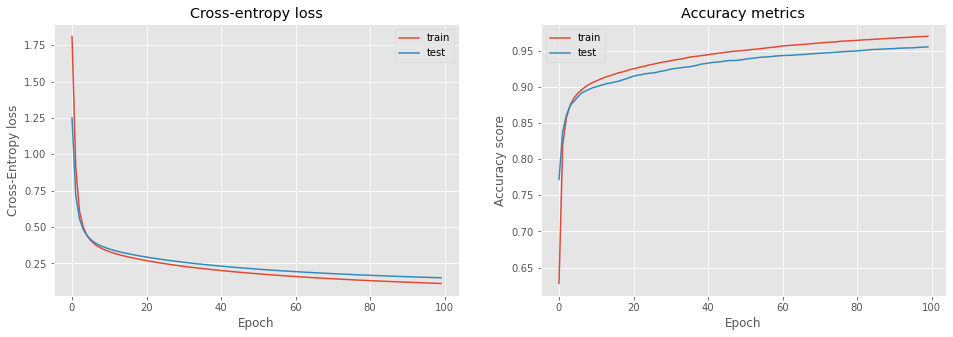

In [56]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5));

ax[0].plot(loss_history_train, label='train')
ax[0].plot(loss_history_eval, label='test')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Cross-Entropy loss')
ax[0].set_title('Cross-entropy loss')
ax[0].legend()

ax[1].plot(accuracy_history_train, label='train')
ax[1].plot(accuracy_history_eval, label='test')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy score')
ax[1].set_title('Accuracy metrics')
ax[1].legend();

Видим, что переобучения не наблюдается

# Оценка качества
Наконец, воспользуясь обученном моделью, сделаем `predict` на данных, которые она никогда не видела (здесь можно придумать интерпретацию, что это данные уже непосредственно увиденные моделью на продакшне).

In [97]:
# переходим в режим оценивания без кэширования
model.evaluate_mode()

correct = 0
y_pred = []
for X_batch, y_batch in generate_batches(X_test.values, y_test_one_hot, batch_size=128):
    y_batch_pred = model(X_batch)
    y_pred_one_hot = make_one_hot(np.argmax(y_batch_pred, axis=1))
    y_pred.extend(y_pred_one_hot)
    
    correct += (y_pred_one_hot == y_batch).all(axis=1).sum()

print(f"Финальный accuracy на test: {correct / len(y_test)}")

Финальный accuracy на test: 0.9596


# Вывод

В данной работе была реализована модель, задача которой научиться классфицировать датасет `MNIST`. В плане оптимизации вычислений, использовался `back propagation`, а также `SGD+Momentum`.

Как итог, видно, что модель со своей задачей справилась, ведь об этом свидетельствует значение метрики. Переобучения не было, но это скорее связано с тем, что модель вообще неглубокая, потому что ни каких явных попыток регуляризации я не предприминмал по ходу обучения.

Также я почти уверен, что данные избыточны, поскольку помимо константных пискелей (которые я благополучно удалил на этапе предобработки), есть также и те, тональность которых совсем чуть-чуть менялась. Наверное, в таком случае было бы хорошо использовать более продвинутые методы, вроде `PCA`.